In [7]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('./input/train.csv', index_col=0)
test_df = pd.read_csv('./input/test.csv', index_col=0)
train_df['MSSubClass'] = train_df['MSSubClass'].astype(str)
train_df['MoSold'] = train_df['MoSold'].astype(str)

y_train = np.log1p(train_df.pop('SalePrice'))
all_df = pd.concat((train_df, test_df), axis=0)

num_cols = all_df.columns[all_df.dtypes != 'object']
cat_cols = all_df.columns[all_df.dtypes == 'object']
all_df[cat_cols]=all_df[cat_cols].fillna('none')

In [8]:
from sklearn.preprocessing import LabelEncoder

for c in cat_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_df[c].values)) 
    all_df[c] = lbl.transform(list(all_df[c].values))

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

num_pipeline = Pipeline([
       ('imputer', Imputer(strategy="median")),
       ('std_scaler', StandardScaler()),
   ])

housing_num_tr = num_pipeline.fit_transform(all_df)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [11]:
housing_num_tr


array([[ 0.77493987, -0.04603831, -0.19181473, ...,  0.15764553,
         0.31905275,  0.20496713],
       [-0.57715187, -0.04603831,  0.51193993, ..., -0.60296158,
         0.31905275,  0.20496713],
       [ 0.77493987, -0.04603831, -0.0510638 , ...,  0.15764553,
         0.31905275,  0.20496713],
       ...,
       [-0.57715187, -0.04603831,  4.26529811, ..., -1.36356868,
         0.31905275, -3.50541458],
       [ 1.85661327, -0.04603831, -0.33256567, ..., -1.36356868,
         0.31905275,  0.20496713],
       [ 0.77493987, -0.04603831,  0.23043806, ..., -1.36356868,
         0.31905275,  0.20496713]])

In [10]:
housing_num_tr.shape

(2919, 79)

In [15]:
#拆分训练集和测试集
dummy_train_df = housing_num_tr.loc[train_df.index]
dummy_test_df = housing_num_tr.loc[test_df.index]
dummy_train_df.shape, dummy_test_df.shape


AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [30]:
dummy_train_df=housing_num_tr[0:train_df.shape[0]]
dummy_train_df.shape

(1460, 79)

In [31]:
dummy_test_df=housing_num_tr[train_df.shape[0]:len(housing_num_tr)]
dummy_test_df.shape

(1459, 79)

In [63]:
#回归岭算法
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
X_train = dummy_train_df
X_test = dummy_test_df

alphas = np.logspace(-2, 3, 200)
test_scores_ridge = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score_ridge = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores_ridge.append(np.mean(test_score_ridge))

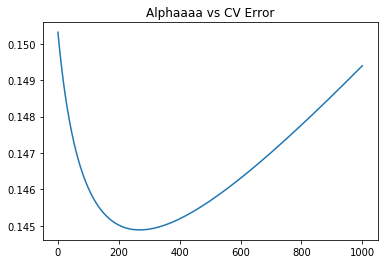

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores_ridge)
plt.title("Alphaaaa vs CV Error");

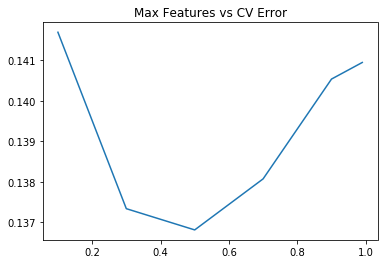

In [39]:
#随机森林
from sklearn.ensemble import RandomForestRegressor
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error");

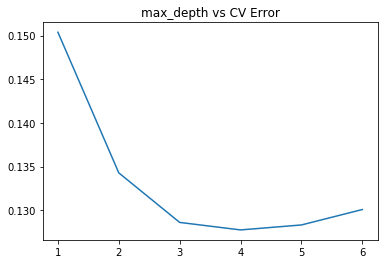

In [40]:
#XGBoost
from xgboost import XGBRegressor
params = [1,2,3,4,5,6]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
    
plt.plot(params, test_scores)
plt.title("max_depth vs CV Error");

In [41]:
clf = XGBRegressor(max_depth=4)
clf.fit(X_train, y_train)
y_clf = np.expm1(clf.predict(X_test))

In [43]:
submission_df = pd.DataFrame(data= {'Id' : test_df.index, 'SalePrice': y_clf})
submission_df.to_csv("./output/house_price_190211_1106.csv",index=False)

In [48]:
test_scores_ridge

[0.15031460970396862,
 0.15031460435101923,
 0.15031459867925445,
 0.15031459266968641,
 0.15031458630219638,
 0.15031457955546793,
 0.15031457240691443,
 0.15031456483260475,
 0.15031455680718225,
 0.1503145483037803,
 0.15031453929393246,
 0.1503145297474769,
 0.15031451963245557,
 0.1503145089150076,
 0.15031449755925547,
 0.15031448552718513,
 0.1503144727785189,
 0.1503144592705808,
 0.15031444495815335,
 0.1503144297933267,
 0.15031441372533824,
 0.15031439670040242,
 0.15031437866153138,
 0.15031435954834382,
 0.15031433929686333,
 0.1503143178393043,
 0.15031429510384503,
 0.15031427101438785,
 0.15031424549030442,
 0.15031421844616585,
 0.15031418979145778,
 0.15031415943027676,
 0.1503141272610104,
 0.1503140931759972,
 0.15031405706116702,
 0.15031401879565934,
 0.1503139782514197,
 0.15031393529277173,
 0.15031388977596352,
 0.1503138415486875,
 0.15031379044957172,
 0.15031373630764072,
 0.15031367894174452,
 0.15031361815995364,
 0.15031355375891836,
 0.15031348552318993,

In [52]:
len(test_scores_ridge),len(alphas)

(200, 200)